<a href="https://colab.research.google.com/github/Salveankit/Topic-Modeling-on-News-Articles/blob/main/Topic_Modelling_on_News_Articles_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Topic Modeling BBC News articles



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Ankit Salve


# **Project Summary -**

This project involves identifying major topics in a collection of BBC news articles using clustering algorithms like Latent Dirichlet Allocation (LDA). The dataset contains news articles from business, entertainment, politics, sports, and technology segments. The main task is to create an aggregate dataset, preprocess the text data, and apply topic modeling to uncover significant themes. The project aims to verify if the extracted topics align with the available tags, providing valuable insights for content analysis and understanding user interests.

# **GitHub Link -**


https://github.com/Salveankit/Topic-Modeling-on-News-Articles.git

# **Problem Statement**


The objective of this project is to perform topic modeling on a collection of BBC news articles, encompassing various segments such as business, entertainment, politics, sports, and technology. The goal is to identify major themes or topics present in the aggregated dataset of news articles using clustering algorithms like Latent Dirichlet Allocation (LDA). Additionally, we aim to verify whether the topics obtained from the modeling process correspond to the predefined tags available for each segment.

The specific tasks include data aggregation, text preprocessing, and applying clustering algorithms to uncover the underlying topics. We will evaluate the quality of the identified topics using relevant metrics and visualization techniques. By interpreting the results, we intend to gain meaningful insights and explore potential associations between the topics and the different news segments.

The successful completion of this project will provide valuable insights into the major themes across BBC news articles, enabling better categorization and organization of news content. It will contribute to improved information retrieval and decision-making processes in the domain of news analysis, benefiting both news readers and content creators.

## 1. Introduction to Data

### 1.1 Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install pyLDAvis

### 1.2 Dataset Loading

In [ ]:
from pathlib import Path

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set folder path
folder_path = '/content/drive/MyDrive/4. Unsupervised ML Project/bbc'

# Read text files and create DataFrame
data = []
for file_path in Path(folder_path).rglob('*.txt'):
    with open(file_path, 'r', encoding='latin-1') as file:
        content = file.read()
    data.append((content, file_path.parent.name))

# Create DataFrame
df = pd.DataFrame(data, columns=['Content', 'Category'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.3 Dataset First View

In [ ]:
df.head()

,Content,Category
0,Solutions to net security fears\n\nFake bank e...,tech
1,Domain system scam fear\n\nA system to make it...,tech
2,T-Mobile bets on 'pocket office'\n\nT-Mobile h...,tech
3,EU software patent law faces axe\n\nThe Europe...,tech
4,Warnings about junk mail deluge\n\nThe amount ...,tech


In [ ]:
df.tail()

,Content,Category
2220,Blair 'up for it' ahead of poll\n\nTony Blair ...,politics
2221,'EU referendum could cost Â£80m'\n\nIt could c...,politics
2222,Economy focus for election battle\n\nBritain's...,politics
2223,Pre-poll clash on tax and spend\n\nLabour and ...,politics
2224,Sainsbury's Labour election gift\n\nScience Mi...,politics


### 1.4 Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'the rows and columns in dataset is {df.shape}')

the rows and columns in dataset is (2225, 2)


### 1.5 Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content   2225 non-null   object
 1   Category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### 1.6 Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

98

In [ ]:
#droping the duplicates
df = df.drop_duplicates()

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### 1.7 Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Content     0
Category    0
dtype: int64

<Axes: >

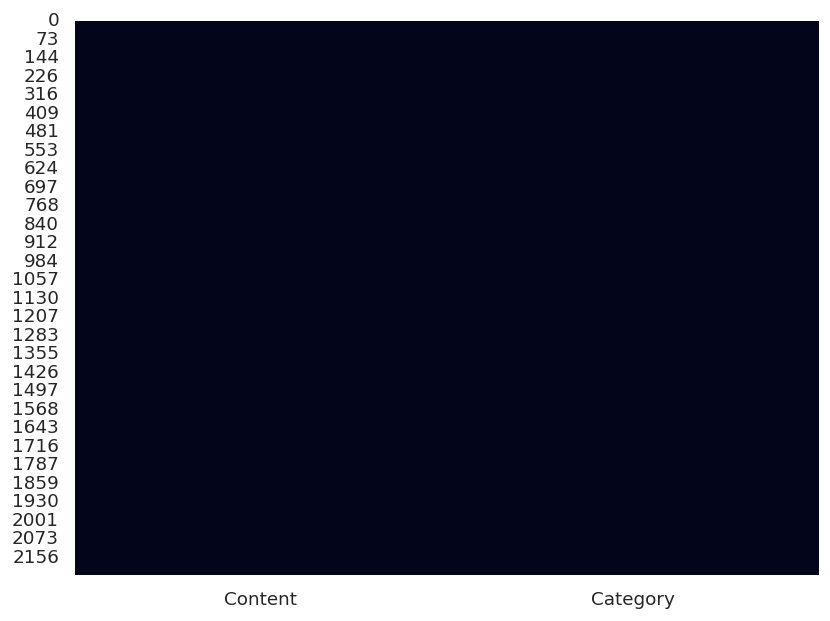

In [ ]:
# Visualizing the missing values
sns.set_theme()
sns.set(rc={"figure.dpi":120, "figure.figsize":(8,6)})
sns.heatmap(df.isnull(), cbar=False)

### 1.8 Data Set features

#### Here is a description of the variables in the given BBC news articles dataset:
**Content** - News articles content

**Category**- Main category of News article

## 2. Data Wrangling

In [ ]:
# Checking articles count per category
df.groupby('Category').size().reset_index(name='Count')

,Category,Count
0,business,503
1,entertainment,369
2,politics,403
3,sport,505
4,tech,347


####Chart 1: Distribution of Category

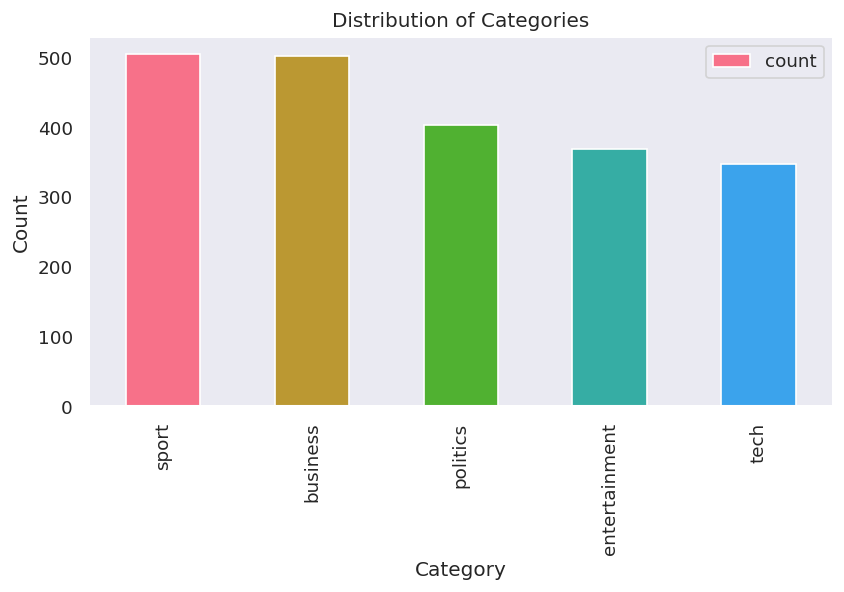

In [ ]:
# Set the color palette
colors = sns.color_palette('husl')

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the bar plot
plt.figure(figsize=(8, 4))
category_counts.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.legend()
plt.grid()
plt.show()

#### Chart 2: Category Distribution

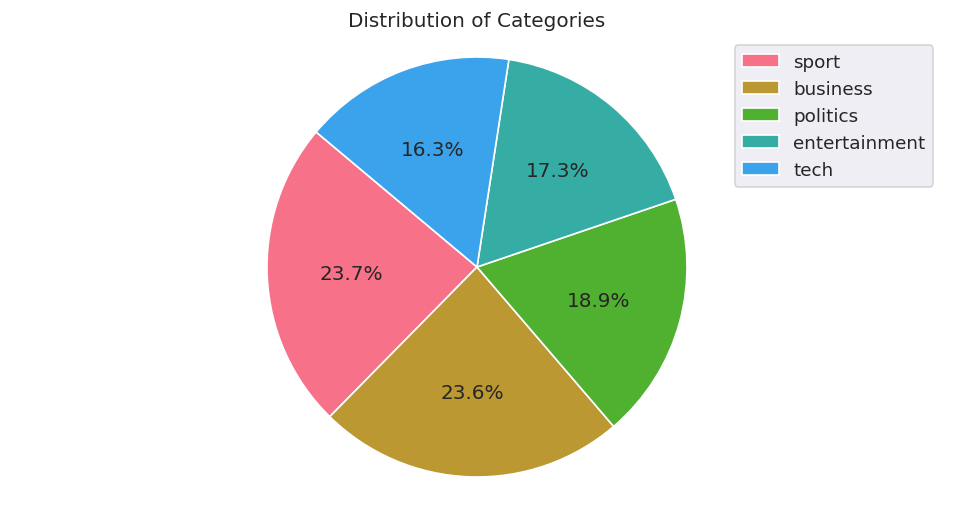

In [ ]:
# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Set the color palette to "husl"
colors = sns.color_palette('husl')

# Plot the pie chart
plt.figure(figsize=(10,5))
plt.pie(category_counts, labels=None, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Categories')
plt.legend(category_counts.index, loc='upper right')
plt.show()

#### Chart 3: Article length distribution

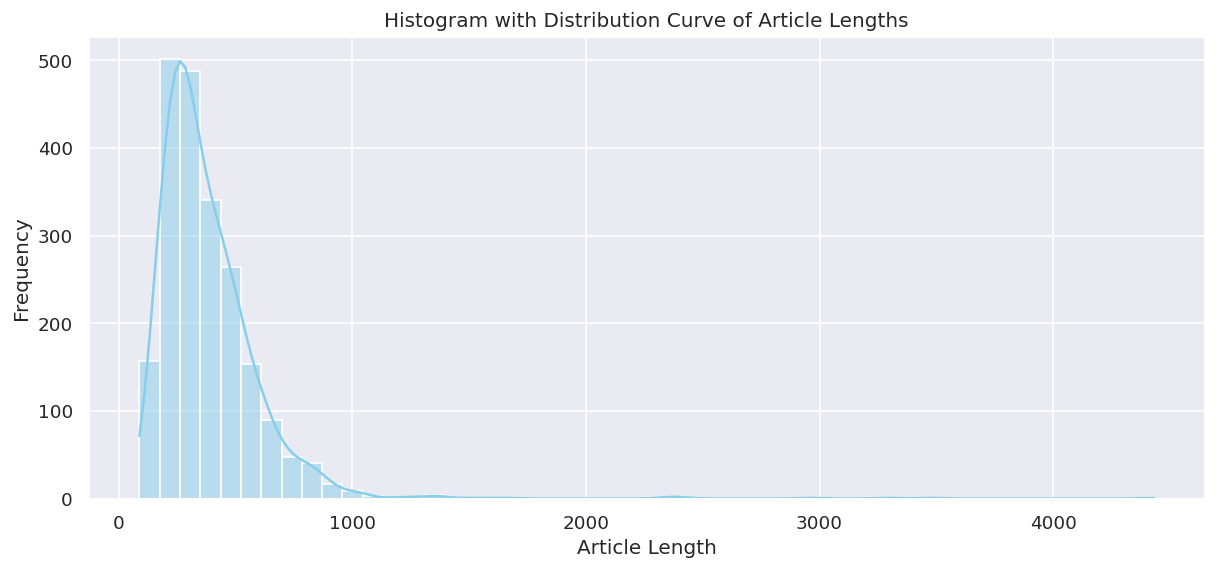

In [ ]:
# Finding length of each content
content_length=df['Content'].apply(lambda x: len(x.split()))
# Plot the histogram with distribution curve
plt.figure(figsize=(12, 5))
sns.histplot(content_length, kde=True, bins=50, color='skyblue')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.title('Histogram with Distribution Curve of Article Lengths')
plt.grid(True)
plt.show()

Insights:

Most of the news articles in the dataset are shorter in length.(about 250 to 300 words) However, there are a few articles that are exceptionally long, and they create a long tail on the right side of the distribution.

## 3. Data Pre-processing

#### Textual Data Preprocessing
#### For topic modeling Expand contactions ,lower casing, removing punctuation, removing URLs and words/digits containing digits, removing stopwords and white spaces, tokenization and text normalization (such as lemmatization or stemming) are the pre processing steps that are necessary.

#### Create a complete fuction to apply all text pre-processing steps in one go

In [ ]:
#installing contractions for expanding text
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.1 MB/s eta 0:00:00


In [ ]:
import contractions
import re

# Download necessary NLTK resources
nltk.download('punkt')      # Download resource for tokenization
nltk.download('stopwords')  # Download list of stop words
nltk.download('wordnet')    # Download WordNet lexical database for lemmatization

#code with the preprocessing functions

def convert_to_lower(text):
    """
    Converts the given text to lowercase.

    Example:
    Input: "I Cannot Believe it is Friday!"
    Output: "i cannot believe it is friday!"
    """
    return text.lower()

def expand_contractions(text):
    """
    Expands contractions in the given text.

    Example:
    Input: "I can't believe it's Friday!"
    Output: "I cannot believe it is Friday!"
    """
    return contractions.fix(text)

def remove_urls_and_digits(text):
    """
    Removes URLs and words/digits containing digits from the given text.

    Example:
    Input: "Visit https://example.com for more information. Call me at +1234567890."
    Output: "Visit for more information. Call me at"
    """
    return re.sub(r'\b\w*\d\w*\b|\bhttps?\S+\b', '', text)

def remove_punctuation(text):
    """
    Removes punctuation marks from the given text.

    Example:
    Input: "Hello, world!"
    Output: "Hello world"
    """
    return re.sub(r'[^\w\s]', '', text)

def remove_stopwords(text):
    """
    Removes common words (stopwords) from the given text.

    Example:
    Input: "I cannot believe it is Friday!"
    Output: "cannot believe Friday"
    """
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

def lemmatize_text(text):
    """
    Lemmatizes the words in the given text.

    Example:
    Input: "running, carrying"
    Output: "run, carry"
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lemmatized_tokens)

# Applying processing to the DataFrame
def process_text(text):
    """
    Applies the entire text processing pipeline to the given text.

    Example:
    Input: "I can't believe it's Friday!"
    Output: "can not believe friday"
    """
    text = convert_to_lower(text)
    text = expand_contractions(text)
    text = remove_urls_and_digits(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Apply the "process_text" function to clean and preprocess the content of each article
df['Processed_Content'] = df['Content'].apply(process_text)

In [ ]:
# First few entries from processed content
df.head()

,Content,Category,Processed_Content
0,Solutions to net security fears\n\nFake bank e...,tech,solution net security fear fake bank email phi...
1,Domain system scam fear\n\nA system to make it...,tech,domain system scam fear system make easier cre...
2,T-Mobile bets on 'pocket office'\n\nT-Mobile h...,tech,tmobile bet pocket office tmobile launched lat...
3,EU software patent law faces axe\n\nThe Europe...,tech,eu software patent law face axe european parli...
4,Warnings about junk mail deluge\n\nThe amount ...,tech,warning junk mail deluge amount spam circulati...


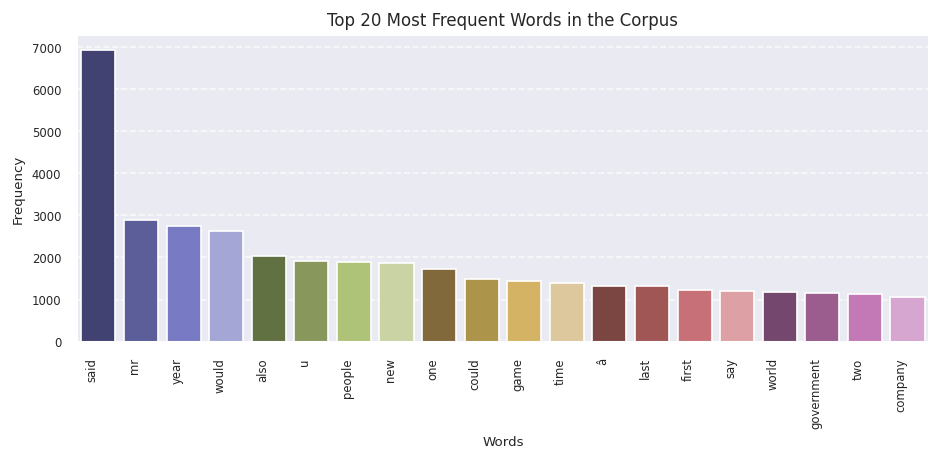

In [ ]:
# Visualising top 20 words in the corpus
from collections import Counter

# Function to plot top N most frequent words in the corpus
def plot_top_words_frequency(data_frame, n=20):
    # Concatenate the preprocessed text from all articles
    concatenated_text = ' '.join(data_frame['Processed_Content'])

    # Tokenize the text into individual words and count their frequency
    word_frequency = Counter(concatenated_text.split())

    # Select the top N most frequent words
    top_frequent_words = dict(word_frequency.most_common(n))

    # Set a colorful color palette
    colors = sns.color_palette('tab20b', n_colors=n)

    # Plot the bar graph with custom colors
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(top_frequent_words.keys()), y=list(top_frequent_words.values()), palette=colors)
    plt.title(f'Top {n} Most Frequent Words in the Corpus', fontsize=10)
    plt.xlabel('Words', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.xticks(rotation=90, ha='right', fontsize=7)
    plt.yticks(fontsize=7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assuming df is your DataFrame and 'processed_Content' is the column with the preprocessed text data
plot_top_words_frequency(df, n=20)


In [ ]:
# Removing unnecessory stopwords
extra_stopwords = ['said', 'mr', 'would', 'also', 'u', 'could', 'â', 'say']

# Function to remove extra stopwords from the text
def remove_extra_stopwords(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Filter out the extra stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in extra_stopwords]

    # Reconstruct the text
    filtered_text = ' '.join(filtered_tokens)

    return filtered_text

In [ ]:
# Apply remove_extra_stopwords on pre-processed text
df['Processed_Content'] = df['Processed_Content'].apply(remove_extra_stopwords)

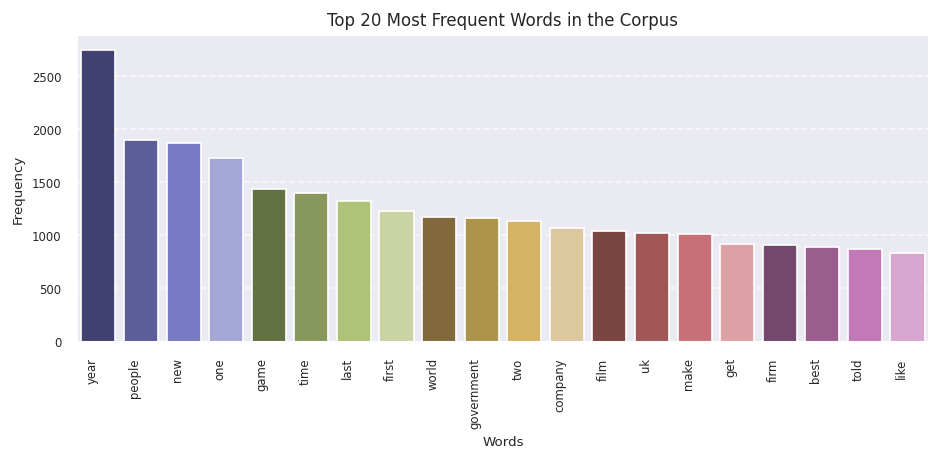

In [ ]:
plot_top_words_frequency(df, n=20)

After visualising we can say that those extra words has removed & we get new list of top 20 most frequent words.

## 4. Model Implementation



####4.1 LDA with BoW

In [ ]:
# Convert preprocessed text to a list of tokenized texts
texts = df['Processed_Content'].apply(lambda x: x.split()).tolist()

# Create a Gensim dictionary
dictionary = corpora.Dictionary(texts)

# Create a Gensim corpus (BoW representation)
corpus = [dictionary.doc2bow(text) for text in texts]

# Define a range of topics to explore
num_topics_range = list(range(5, 20))

# Initialize variables to store the best model and metrics score
best_lda_bow_gensim_model = None
best_lda_bow_gensim_coherence_score = -1
best_lda_bow_gensim_num_topics = 0

for num_topics in num_topics_range:
    lda_model_bow_gensim = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=3)
    coherence_model_gensim = CoherenceModel(model=lda_model_bow_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score_gensim = coherence_model_gensim.get_coherence()

    if coherence_score_gensim > best_lda_bow_gensim_coherence_score:
        best_lda_bow_gensim_coherence_score = coherence_score_gensim
        best_lda_bow_gensim_num_topics = num_topics
        best_lda_bow_gensim_model = lda_model_bow_gensim

# Print the best number of topics
print("Best number of topics:", best_lda_bow_gensim_num_topics)

# Calculate and print the metrics scores for the best model
best_log_likelihood = best_lda_bow_gensim_model.log_perplexity(corpus)
best_perplexity = best_lda_bow_gensim_model.bound(corpus)
print("Best coherence score for the LDA model:", best_lda_bow_gensim_coherence_score)
print("Best log likelihood score for the LDA model:", best_log_likelihood)
print("LDA model Perplexity on train data:", best_perplexity)

Best number of topics: 13
Best coherence score for the LDA model: 0.5243100527713884
Best log likelihood score for the LDA model: -8.411996470840181
LDA model Perplexity on train data: -3675728.5899426937


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the LDA model
lda_bow_vis_data = gensimvis.prepare(best_lda_bow_gensim_model, corpus, dictionary)
pyLDAvis.display(lda_bow_vis_data)

#### 4.2 LDA with gensim-Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert preprocessed text to a list of tokenized texts
texts = df['Processed_Content'].apply(lambda x: x.split()).tolist()

# Create CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Processed_Content'])

# Convert the count_matrix to a list of lists
corpus = [list(zip(doc.indices, doc.data)) for doc in count_matrix]

# Create a Gensim dictionary from the CountVectorizer vocabulary
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in count_vectorizer.vocabulary_.items()))

# Define a range of topics to explore
num_topics_range = list(range(5, 10))

# Initialize variables to store the best model and metrics score
best_lda_count_gensim_model = None
best_lda_count_gensim_coherence_score = -1
best_lda_count_gensim_num_topics = 0

for num_topics in num_topics_range:
    lda_model_count_gensim = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=3)
    coherence_model = CoherenceModel(model=lda_model_count_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    if coherence_score > best_lda_count_gensim_coherence_score:
        best_lda_count_gensim_coherence_score = coherence_score
        best_lda_count_gensim_num_topics = num_topics
        best_lda_count_gensim_model = lda_model_count_gensim

# Print the best number of topics
print("Best number of topics:", best_lda_count_gensim_num_topics)

# Calculate and print the best metrics scores for the model
best_log_likelihood = best_lda_count_gensim_model.log_perplexity(corpus)
best_perplexity = best_lda_count_gensim_model.bound(corpus)
print("Best coherence score for the LDA model:", best_lda_count_gensim_coherence_score)
print("Best log likelihood score for the LDA model:", best_log_likelihood)
print("LDA model Perplexity on train data:", best_perplexity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best number of topics: 6
Best coherence score for the LDA model: 0.550365440541457
Best log likelihood score for the LDA model: -8.355693010843192
LDA model Perplexity on train data: -3642614.57165426


In [ ]:
# Visualize the LDA model
lda_count_vis_data = gensimvis.prepare(best_lda_count_gensim_model, corpus, dictionary)
pyLDAvis.display(lda_count_vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####4.3 LDA with gensim-TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is your DataFrame and 'Processed_Content' is the column with the preprocessed text data

# Convert preprocessed text to a list of tokenized texts
texts = df['Processed_Content'].apply(lambda x: x.split()).tolist()

# Create TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Content'])

# Import the gensim module
import gensim

# Convert the TF-IDF matrix to Gensim format
corpus_tfidf = gensim.matutils.Sparse2Corpus(tfidf_matrix.T)

# Create a Gensim dictionary from the TF-IDF Vectorizer vocabulary
dictionary_tfidf = corpora.Dictionary.from_corpus(corpus_tfidf, id2word=dict((id, word) for word, id in tfidf_vectorizer.vocabulary_.items()))

# Define a range of topics to explore
num_topics_range = list(range(5, 20))

# Initialize variables to store the best model and metrics score
best_lda_tfidf_gensim_model = None
best_lda_tfidf_gensim_coherence_score = -1
best_lda_tfidf_gensim_num_topics = 0

for num_topics in num_topics_range:
    lda_model_tfidf_gensim = models.LdaMulticore(corpus_tfidf, num_topics=num_topics, id2word=dictionary_tfidf, passes=10, workers=3)
    coherence_model_tfidf_gensim = CoherenceModel(model=lda_model_tfidf_gensim, texts=texts, dictionary=dictionary_tfidf, coherence='c_v')
    coherence_score_tfidf_gensim = coherence_model_tfidf_gensim.get_coherence()

    if coherence_score_tfidf_gensim > best_lda_tfidf_gensim_coherence_score:
        best_lda_tfidf_gensim_coherence_score = coherence_score_tfidf_gensim
        best_lda_tfidf_gensim_num_topics = num_topics
        best_lda_tfidf_gensim_model = lda_model_tfidf_gensim

# Print the best number of topics for TF-IDF Vectorizer
print("Best number of topics (TF-IDF Vectorizer):", best_lda_tfidf_gensim_num_topics)

# Calculate and print the best metrics scores for the TF-IDF Vectorizer model
best_log_likelihood_tfidf = best_lda_tfidf_gensim_model.log_perplexity(corpus_tfidf)
best_perplexity_tfidf = best_lda_tfidf_gensim_model.bound(corpus_tfidf)
print("Best coherence score for the LDA model (TF-IDF Vectorizer):", best_lda_tfidf_gensim_coherence_score)
print("Best log likelihood score for the LDA model (TF-IDF Vectorizer):", best_log_likelihood_tfidf)
print("LDA model Perplexity on train data (TF-IDF Vectorizer):", best_perplexity_tfidf)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best number of topics (TF-IDF Vectorizer): 17
Best coherence score for the LDA model (TF-IDF Vectorizer): 0.605194432009224
Best log likelihood score for the LDA model (TF-IDF Vectorizer): -13.935008166560284
LDA model Perplexity on train data (TF-IDF Vectorizer): -267688.8811963754


In [ ]:
# Visualize the LDA model
lda_tfidf_vis_data = gensimvis.prepare(best_lda_tfidf_gensim_model, corpus, dictionary)
pyLDAvis.display(lda_tfidf_vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####4.4 LDA with Count Vectorizer

The LdaMulticore function is part of the Gensim library, and it is used for training Latent Dirichlet Allocation (LDA) models on multi-core processors. However, LdaMulticore is typically used with Gensim's own corpus format, and it does not natively accept a document-term matrix or count vectorizer as input. That's why to use LdaMulticore with a count vectorizer and TF-IDF vectorizer, we converted the count matrix and TF-IDF vectorized matrix from the scikit-learn format to Gensim's corpus format. Now we are using count matrix and TF-IDF vectorized matrix directly with LDA only.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Create CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Processed_Content'])

# Define the parameter grid for grid search
grid_params = {'n_components': list(range(5, 20))}

# Create an instance of LDA
lda = LatentDirichletAllocation()

# Perform grid search to find the best LDA model
lda_count_model = GridSearchCV(lda, param_grid=grid_params)
lda_count_model.fit(count_matrix)

# Get the best LDA model
best_lda_count_model = lda_count_model.best_estimator_

# Best parameters
best_count_parameters = lda_count_model.best_params_
count_log_likelihood_score = lda_count_model.best_score_
count_perplexity = best_lda_count_model.perplexity(count_matrix)

# Print the best parameters and scores
print("Best LDA model's params:", best_count_parameters)
print("Best log likelihood Score for the LDA model:", count_log_likelihood_score)
print("LDA model Perplexity on train data:", count_perplexity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best LDA model's params: {'n_components': 5}
Best log likelihood Score for the LDA model: -912855.5367976343
LDA model Perplexity on train data: 4393.5063714525995


In [ ]:
# Get the topic-term distributions from the best LDA model
topic_term_dists = best_lda_count_model.components_ / best_lda_count_model.components_.sum(axis=1)[:, np.newaxis]

# Get the document-topic distributions from the best LDA model
doc_topic_dists = best_lda_count_model.transform(count_matrix)

# Calculate the term frequency by summing the count vectorized data
term_frequency = count_matrix.sum(axis=0).A1

# Get the feature names from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Calculate the document lengths
doc_lengths = count_matrix.sum(axis=1).A1

# Prepare the data for visualization
lda_count_display = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, feature_names, term_frequency)

# Display the visualization
pyLDAvis.display(lda_count_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####4.5 LDA With TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert preprocessed text to a list of tokenized texts
texts = df['Processed_Content'].apply(lambda x: x.split()).tolist()

# Create TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Content'])

# Define the parameter grid for grid search
grid_params = {'n_components': list(range(5, 20))}

# Create an instance of LDA
lda = LatentDirichletAllocation()

# Perform grid search to find the best LDA model
lda_tfidf_model = GridSearchCV(lda, param_grid=grid_params)
lda_tfidf_model.fit(tfidf_matrix)

# Get the best LDA model
best_lda_tfidf_model = lda_tfidf_model.best_estimator_

# Best parameters
best_tfidf_parameters = lda_tfidf_model.best_params_
tfidf_log_likelihood_score = lda_tfidf_model.best_score_
tfidf_perplexity = best_lda_tfidf_model.perplexity(tfidf_matrix)

# Print the best parameters and scores
print("Best LDA model's params (TF-IDF Vectorizer):", best_tfidf_parameters)
print("Best log likelihood Score for the LDA model (TF-IDF Vectorizer):", tfidf_log_likelihood_score)
print("LDA model Perplexity on train data (TF-IDF Vectorizer):", tfidf_perplexity)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best LDA model's params (TF-IDF Vectorizer): {'n_components': 5}
Best log likelihood Score for the LDA model (TF-IDF Vectorizer): -52438.394663498344
LDA model Perplexity on train data (TF-IDF Vectorizer): 37977.71789815764


In [ ]:
# Get the topic-term distributions from the best LDA model
topic_term_dists = best_lda_tfidf_model.components_ / best_lda_tfidf_model.components_.sum(axis=1)[:, np.newaxis]

# Get the document-topic distributions from the best LDA model
doc_topic_dists = best_lda_tfidf_model.transform(tfidf_matrix)

# Calculate the term frequency by summing the tfidf vectorized data
term_frequency = tfidf_matrix.sum(axis=0).A1

# Get the feature names from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Calculate the document lengths
doc_lengths = tfidf_matrix.sum(axis=1).A1

# Prepare the data for visualization
lda_tfidf_display = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, feature_names, term_frequency)

# Display the visualization
pyLDAvis.display(lda_tfidf_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Conclusion**

**LDA with BoW**

Best number of topics: 13

Best coherence score for the LDA model: 0.5243100527713884

Best log likelihood score for the LDA model: -8.411996470840181

LDA model Perplexity on train data: -3675728.5899426937

**LDA with gensim-Count Vectorizer**

Best number of topics: 6

Best coherence score for the LDA model: 0.550365440541457

Best log likelihood score for the LDA model: -8.355693010843192

LDA model Perplexity on train data: -3642614.57165426

**LDA with gensim-TF-IDF Vectorizer**

Best number of topics (TF-IDF Vectorizer): 17

Best coherence score for the LDA model (TF-IDF Vectorizer): 0.605194432009224

Best log likelihood score for the LDA model (TF-IDF Vectorizer): -13.935008166560284

LDA model Perplexity on train data (TF-IDF Vectorizer): -267688.8811963754

**LDA with Count Vectorizer**

Best LDA model's params: {'n_components': 5}

Best log likelihood Score for the LDA model: -912855.5367976343

LDA model Perplexity on train data: 4393.5063714525995

**LDA With TF IDF**

Best LDA model's params (TF-IDF Vectorizer): {'n_components': 5}

Best log likelihood Score for the LDA model (TF-IDF Vectorizer): -52438.394663498344

LDA model Perplexity on train data (TF-IDF Vectorizer): 37977.71789815764

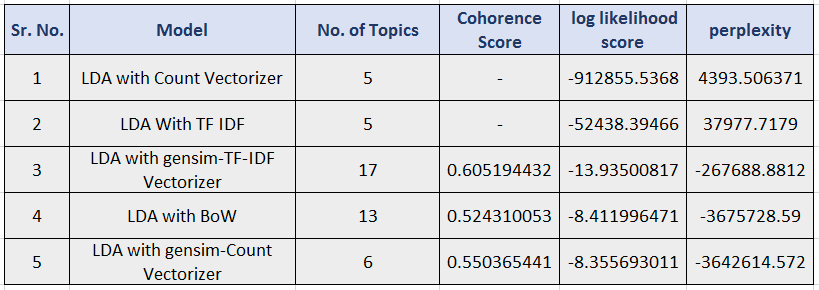

After applying Latent Dirichlet Allocation (LDA) topic modeling on BBC news articles, we compared several text vectorization methods to find the best-performing model. Among the options, the **LDA model with Count Vectorizer** emerged as the top performer, achieving the lowest log likelihood score and a manageable number of topics (5). This winning combination ensures both accuracy and interpretability, enabling us to gain meaningful insights from the news articles. With the LDA model using Count Vectorizer, we are well-equipped to extract valuable information and make informed decisions in the realm of BBC news analysis.

Project Impact: Benefit to Stakeholders

1. **Informed Content Strategy:**

  Media organizations and editors can align their content strategy with popular themes, leading to increased readership and engagement.


2.  **Personalized Recommendations:**

  Content curation and recommendation systems can offer personalized news articles to users, improving user experience and retention.


3.  **Effective Advertising Campaigns:**

  Advertisers and marketers can strategically place ads that resonate with news topics, resulting in targeted and impactful advertising efforts.


4.  **Insightful News Reporting:**

 Journalists and reporters can identify emerging trends and unique angles for news stories, enhancing the depth and relevance of their reporting.